#### Co-Occurrence Matrix with a fixed context window

- Similar words tend to occur together and will have a similar context for example — Apple is a fruit. Mango is a fruit.
- Apple and mango tend to have a similar context i.e fruit.

- `Co-occurrence` — For a given corpus, the co-occurrence of a pair of words say w1 and w2 is the number of times they have appeared together in a Context Window.

- `Context Window` — Context window is specified by a number and the direction.

#### How to form the Co-occurrence matrix:
- The matrix A stores co-occurrences of words.
- In this method, we count the number of times each word appears inside a window of a particular size around the word of interest.
- Calculate this count for all the words in the corpus.

In [1]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd

In [9]:
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current  = bigram[0][1]
        previous = bigram[0][0]
        
        count        = bigram[1]
        pos_current  = vocab_index[current]
        pos_previous = vocab_index[previous]
        
        co_occurrence_matrix[pos_current][pos_previous] = count
        
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index

In [10]:
text_data = [['Where', 'Python', 'is', 'used'],
             ['What', 'is', 'Python', 'used', 'in'],
             ['Why', 'Python', 'is', 'best'],
             ['What', 'companies', 'use', 'Python']]

In [11]:
# Create one list using many lists
data = list(itertools.chain.from_iterable(text_data))

In [12]:
print(data)

['Where', 'Python', 'is', 'used', 'What', 'is', 'Python', 'used', 'in', 'Why', 'Python', 'is', 'best', 'What', 'companies', 'use', 'Python']


In [13]:
matrix, vocab_index = generate_co_occurrence_matrix(data)

In [14]:
data_matrix = pd.DataFrame(matrix, 
                           index  = vocab_index,
                           columns= vocab_index)
data_matrix

,Where,used,companies,best,What,use,in,is,Why,Python
Where,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
used,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
companies,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
best,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
What,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
use,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
in,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
is,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
Why,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Python,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## Example

sent 1 : Data Science is part of AI

Sent 2 : Machine learning is part of AI

There are 3 parts to creating a co-occurrence matrix. 
- Matrix of unique words
- Focus word
- Window length

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [16]:
doc = ['Data Science is part of AI',
       'Machine learning is part of AI'
      ]

- Default token_pattern considers only words which have 2 or more alphanumerics as a token.
- Default token_pattern ignores single character words like I, a etc.
- Making token_pattern=r"(?u)\b\w+\b" will make words with 1 or more alphanumerics as a token

In [17]:
vect = CountVectorizer(stop_words=None, token_pattern=r"(?u)\b\w+\b")
X = vect.fit_transform(doc)

In [18]:
print("Set of unique words in the document is given by: \n{}".format(vect.get_feature_names()))

Set of unique words in the document is given by: 
['ai', 'data', 'is', 'learning', 'machine', 'of', 'part', 'science']


D:\Anaconda-16-FEB\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
# Create a co-occurrence matrix of unique words and initialize them to zero
uniq_wrds = vect.get_feature_names()

n = len(uniq_wrds)

co_mat = np.zeros((n,n))
co_mat

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
window_len = 2

In [21]:
def update_co_mat(x):   
    # Get all the words in the sentence and store it in an array wrd_lst
    wrd_list = x.split(' ')
    
    # Consider each word as a focus word
    for focus_wrd_indx, focus_wrd in enumerate(wrd_list):
        focus_wrd = focus_wrd.lower()
        
        # Get the indices of all the context words for the given focus word
        for contxt_wrd_indx in range((max(0,focus_wrd_indx - window_len)), (min(len(wrd_list),focus_wrd_indx + window_len +1))):                        
            
            # If context words are in the unique words list
            if wrd_list[contxt_wrd_indx] in uniq_wrds:
                
                # To identify the row number, get the index of the focus_wrd in the uniq_wrds list
                co_mat_row_indx = uniq_wrds.index(focus_wrd)
                
                # To identify the column number, get the index of the context words in the uniq_wrds list
                co_mat_col_indx = uniq_wrds.index(wrd_list[contxt_wrd_indx])
                                
                # Update the respective columns of the corresponding focus word row
                co_mat[co_mat_row_indx][co_mat_col_indx] += 1

In [22]:
for sentence in doc:
    update_co_mat(sentence)
print()
print("Co-occurrence Matrix: ")
print(co_mat)


Co-occurrence Matrix: 
[[0. 0. 0. 0. 0. 2. 2. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 2. 1. 0. 2. 2. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 2. 2. 0.]
 [0. 0. 2. 1. 0. 2. 2. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0.]]


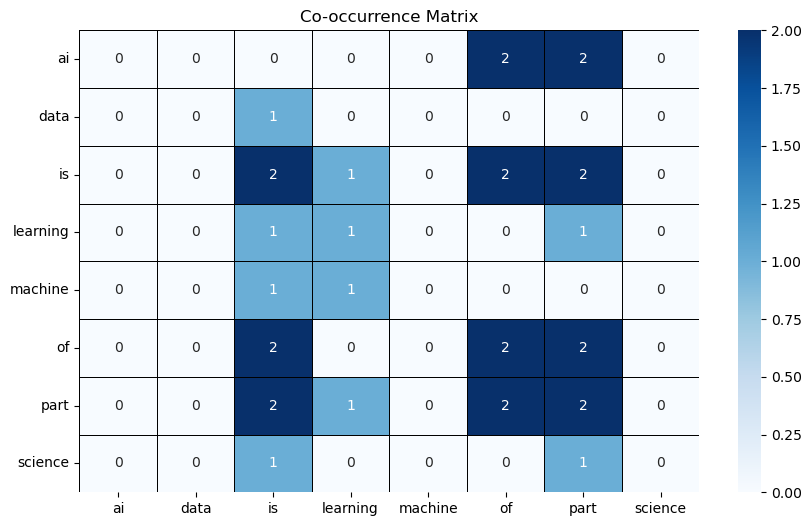

In [23]:
figure(figsize=(10, 6))

df_cm1 = pd.DataFrame(co_mat, index=uniq_wrds, columns=uniq_wrds)

cf_hm1 = sns.heatmap(df_cm1, 
                     annot=True, 
                     xticklabels=uniq_wrds, 
                     yticklabels=uniq_wrds, 
                     linewidths=.5, 
                     linecolor='black', 
                     cmap="Blues")

plt.yticks(rotation=0)
plt.title('Co-occurrence Matrix');

In [41]:
doc

['Data Science is part of AI', 'Machine learning is part of AI']

#### Problem 
— For a huge corpus, this co-occurrence matrix could become really complex (high-dimension).

#### Solution 
— `Singular value decomposition(SVD)` and `principal component analysis(PCA)` are two eigenvalue methods used to reduce a high-dimensional dataset into fewer dimensions while retaining important information.

#### Singular values of a matrix
Let A be an m*m matrix. The product Aᵀ A is a symmetric matrix.

In [48]:
import numpy as np
import re

In [49]:
location = r'D:\MYLEARN\DATASETS\dorian.txt'

In [50]:
book = open(location,'r')

In [51]:
book_string = book.read().lower()

In [52]:
len(book_string)

433690

In [53]:
book_string[:500]

"the picture of dorian gray\n\nby\n\noscar wilde\n\n\n\n\nthe preface\n\nthe artist is the creator of beautiful things.  to reveal art and\nconceal the artist is art's aim.  the critic is he who can translate\ninto another manner or a new material his impression of beautiful\nthings.\n\nthe highest as the lowest form of criticism is a mode of autobiography.\nthose who find ugly meanings in beautiful things are corrupt without\nbeing charming.  this is a fault.\n\nthose who find beautiful meanings in beautiful things"

In [54]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ",raw)
    words = clean.split()
    return words

In [55]:
list_of_words = sentence_to_wordlist(book_string)

In [56]:
len(list_of_words)

80393

unique words 

In [57]:
list_of_words = list(set(list_of_words))

In [58]:
len(list_of_words)

6798

In [59]:
list_of_words[:10]

['gazed',
 'inmost',
 'hall',
 'sway',
 'enthralled',
 'shelves',
 'rebuked',
 'isabella',
 'agree',
 'blows']

In [60]:
from nltk.tokenize import sent_tokenize
list_of_sentences = sent_tokenize(book_string)

In [61]:
len(list_of_sentences)

6494

In [63]:
sent_lengths = [len(sent) for sent in list_of_sentences]

In [73]:
min(sent_lengths), max(sent_lengths), np.mean(sent_lengths)

(3, 2541, 64.87203572528487)

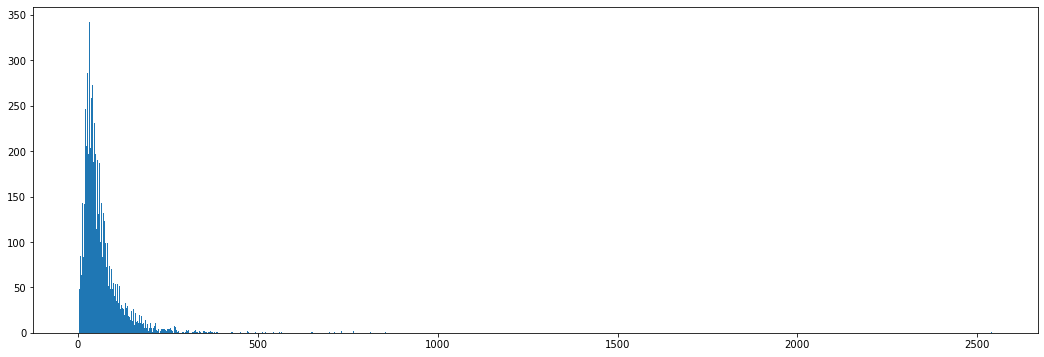

In [71]:
plt.figure(figsize=(18, 6))
plt.hist(sent_lengths, bins=1000);

In [75]:
list_of_sentences[20:30]

['the artist\ncan express everything.',
 'thought and language are to the artist\ninstruments of an art.',
 'vice and virtue are to the artist materials for\nan art.',
 'from the point of view of form, the type of all the arts is\nthe art of the musician.',
 "from the point of view of feeling, the\nactor's craft is the type.",
 'all art is at once surface and symbol.',
 'those who go beneath the surface do so at their peril.',
 'those who read\nthe symbol do so at their peril.',
 'it is the spectator, and not life,\nthat art really mirrors.',
 'diversity of opinion about a work of art\nshows that the work is new, complex, and vital.']

#### create our co-occurrence matrix

In [77]:
cooc = np.zeros((len(list_of_words), len(list_of_words)), np.float64)

In [78]:
def process_sentence(sentence):
    words_in_sentence = sentence_to_wordlist(sentence)
    list_of_indeces   = [list_of_words.index(word) for word in words_in_sentence]
    
    for index1 in list_of_indeces:
        for index2 in list_of_indeces:
            if index1 != index2:
                cooc[index1, index2] +=1

In [79]:
%%time
for sentence in list_of_sentences:
    process_sentence(sentence)

Wall time: 7.77 s


In [83]:
cooc.shape

(6798, 6798)

In [81]:
from numpy.linalg import norm

def cos_dis(u,v):
    dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))
    return dist

List the words in increasing order of distance, selecting the top 5 words.

In [87]:
sorted_list = sorted(list_of_words, key = lambda word: cos_dis(cooc[15,:],  cooc[list_of_words.index(word),:]))
sorted_list[:5]

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


['mantelshelf', 'still', 'saw', 'window', 'at']

#### SVD
Let’s try the same in a lower dimensional space. Warning: this may take a while.

In [88]:
from numpy.linalg import svd
U,S,V = svd(cooc)

let’s look at the first 40 eigenvalues.

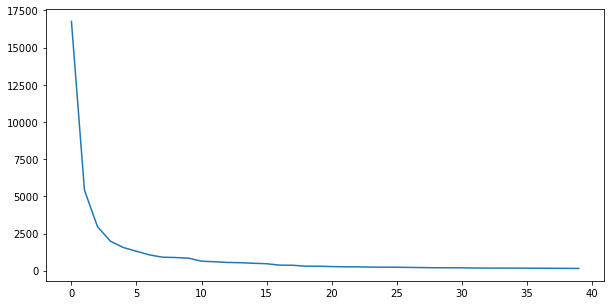

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.plot(S[:40])


So, let’s reduce from a 7122 dimensional space to a 40 dimensional space. 

Now the vector associated to the word ‘dead’ (the 16th word) is:

In [91]:
emb = U[:,:40]
emb[15, :] # the 16th word `dead`

array([-0.00087474, -0.00101185, -0.00037585,  0.00108591, -0.00010285,
        0.00151967, -0.00179088, -0.00038896, -0.00075055,  0.00036015,
       -0.00434299,  0.00469412, -0.00225849, -0.00186195,  0.00243258,
       -0.00317881,  0.0013976 ,  0.00317467,  0.00114518, -0.00353434,
        0.00448211,  0.00366357, -0.00026611,  0.00044957, -0.00307638,
        0.00373712, -0.00087078, -0.00222879, -0.00444588, -0.00048811,
       -0.0001573 ,  0.00015633, -0.00403972,  0.00510009,  0.00269403,
        0.00293509, -0.00113639, -0.00301723,  0.00820139, -0.00272365])

In [92]:
cos_dis(emb[15,:], emb[list_of_words.index('wedding'),:])

0.8934989078810573

In [94]:
sorted(list_of_words, key = lambda word: cos_dis(emb[15,:],emb[list_of_words.index(word),:]))[:5]

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


['mantelshelf', 'arabian', 'bezoar', 'deer', 'plague']